In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#sites = ['ADHD1',
#        'ADHD3',
#        'ADHD5',
#        'ADHD6',
#        'HSJ',
#        'Svip1',
#        'Svip2',
#        'SZ3',
#        'SZ6',
#        'UCLA_CB',
#        'UCLA_DS1',
#        'UKBB11025',
#        'UKBB11026',
#        'UKBB11027']

# Order by n in site
sites = ['USM', # why this missing?
        'SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'SZ2',
        'SZ1',
        'UCLA_CB',
        'Svip1',
        'ADHD1',
        'ADHD3',
        'NYU',
        'ADHD5',
        'UCLA_DS1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025']

p_age = './results/age/'

In [149]:
nsite = {'ABIDEII-BNI_1': 6,
 'ABIDEII-ETH_1': 23,
 'ABIDEII-GU_1': 26,
 'ABIDEII-IP_1': 7,
 'ABIDEII-IU_1': 3,
 'ABIDEII-KKI_1': 17,
 'ABIDEII-NYU_1': 27,
 'ABIDEII-OHSU_1': 27,
 'ABIDEII-OILH_2': 13,
 'ABIDEII-SDSU_1': 21,
 'ABIDEII-SU_2': 7,
 'ABIDEII-TCD_1': 18,
 'ABIDEII-UCD_1': 10,
 'ABIDEII-UCLA_1': 9,
 'ABIDEII-USM_1': 13,
 'ABIDEII-U_MIA_1': 10,
 'ADHD1': 54,
 'ADHD3': 56,
 'ADHD4': 14,
 'ADHD5': 77,
 'ADHD6': 39,
 'Cardiff': 8,
 'HSJ': 39,
 'KKI': 22,
 'LEUVEN_1': 5,
 'MAX_MUN': 11,
 'NYU': 66,
 'OLIN': 8,
 'SDSU': 13,
 'SZ1': 42,
 'SZ10': 9,
 'SZ2': 41,
 'SZ3': 31,
 'SZ4': 25,
 'SZ5': 17,
 'SZ6': 35,
 'SZ7': 14,
 'SZ8': 14,
 'SZ9': 14,
 'Svip1': 48,
 'Svip2': 36,
 'TRINITY': 25,
 'UCLA_1': 24,
 'UCLA_2': 5,
 'UCLA_CB': 43,
 'UCLA_DS1': 94,
 'UCLA_DS2': 19,
 'UKBB11025': 1000,
 'UKBB11026': 1000,
 'UKBB11027': 1000,
 'UM_1': 10,
 'USM': 30,
 'YALE': 15}

# Load Data

In [150]:
# Single Task
st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [151]:
# Multi-task
mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_age, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


In [152]:
# Multi-task no UKBB
mtl_data_no_ukbb = []
for fold in range(5):
    p_parent = os.path.join(p_age, f"all_no_ukbb/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data_no_ukbb.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Loss

In [153]:
# Single Task
st_loss = []
st_loss_std = []
for site in sites:
    vals = [st_data[site][fold]['Loss/test'].iloc[-1] for fold in range(5)]
    st_loss.append(np.mean(vals))
    st_loss_std.append(np.std(vals))

st_loss = pd.Series(st_loss,index=sites)
st_loss_std = pd.Series(st_loss_std,index=sites)

In [154]:
# Multi-task
mtl_loss = []
for fold in range(4): # missing last fold
    df = mtl_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
    mtl_loss.append(df)
    
mtl_loss_std = pd.concat(mtl_loss,axis=1).std(axis=1)
mtl_loss = pd.concat(mtl_loss,axis=1).mean(axis=1)

In [155]:
# Multi-task no UKBB
mtl_loss_no_ukbb = []
for fold in range(5):
    df = mtl_data_no_ukbb[fold].transpose().reset_index()
    df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
    mtl_loss_no_ukbb.append(df)
    
mtl_loss_no_ukbb_std = pd.concat(mtl_loss_no_ukbb,axis=1).std(axis=1)
mtl_loss_no_ukbb = pd.concat(mtl_loss_no_ukbb,axis=1).mean(axis=1)

# Tables

In [156]:
df = pd.concat([st_loss,mtl_loss,st_loss_std,mtl_loss_std,mtl_loss_no_ukbb,mtl_loss_no_ukbb_std],axis=1)
df.columns = ['ST','MTL','ST_std','MTL_std','MTL_no_ukbb','MTL_no_ukbb_std']
df['diff'] = df['MTL'] - df['ST']
df['diff_no_ukbb'] = df['MTL_no_ukbb'] - df['ST']
df

,ST,MTL,ST_std,MTL_std,MTL_no_ukbb,MTL_no_ukbb_std,diff,diff_no_ukbb
USM,14.067920,11.666840,2.359212,12.903022,4.160274,3.614111,-2.401081,-9.907647
SZ3,13.445051,12.911091,5.319043,5.509834,11.978199,6.447153,-0.533960,-1.466851
SZ6,11.565257,8.212914,5.707526,4.685869,14.204214,9.452814,-3.352343,2.638958
Svip2,13.100706,6.952640,5.000723,2.877334,4.785418,2.474448,-6.148067,-8.315288
ADHD6,0.185142,0.374256,0.091976,0.210872,0.253110,0.176333,0.189114,0.067968
HSJ,21.970699,26.171525,7.694267,17.949246,35.022453,9.617439,4.200826,13.051755
SZ2,19.448307,10.453136,9.518662,7.748538,13.594409,7.753309,-8.995171,-5.853898
SZ1,23.763197,22.558455,13.132330,24.867999,28.858098,21.086210,-1.204742,5.094901
UCLA_CB,5.705241,8.325594,2.005002,4.057585,2.832970,1.204605,2.620353,-2.872271
Svip1,25.537179,16.156182,12.551082,6.694674,17.023387,14.530870,-9.380997,-8.513791


In [157]:
df.mean()

ST                 10.471891
MTL                 8.941140
ST_std              3.980585
MTL_std             5.475357
MTL_no_ukbb        10.184371
MTL_no_ukbb_std     5.442728
diff               -1.530751
diff_no_ukbb       -1.044167
dtype: float64

In [158]:
sites_no_ukbb = [site for site in sites if site[:4]!='UKBB']
df[df.index.isin(sites_no_ukbb)].mean()

ST                 11.228538
MTL                 9.581617
ST_std              4.644625
MTL_std             6.483809
MTL_no_ukbb        10.184371
MTL_no_ukbb_std     5.442728
diff               -1.646921
diff_no_ukbb       -1.044167
dtype: float64

# Plots

In [70]:
lenmax = 25
site_labels = []
for site in sites:
    n = f'{nsite[site]}'
    nspaces = lenmax - 2*len(site) - len(n)
    label = site.upper()+(' '*nspaces)+f'n={n}'
    site_labels.append(label)
    print(f"'{label}',")

'USM                 n=30',
'SZ3                 n=31',
'SZ6                 n=35',
'SVIP2             n=36',
'ADHD6             n=39',
'HSJ                 n=39',
'SZ2                 n=41',
'SZ1                 n=42',
'UCLA_CB         n=43',
'SVIP1             n=48',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                 n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',
'UKBB11026   n=1000',
'UKBB11027   n=1000',
'UKBB11025   n=1000',


In [143]:
site_labels = [
'USM                  n=30',
'SZ3                   n=31',
'SZ6                   n=35',
'SVIP2               n=36',
'ADHD6             n=39',
'HSJ                   n=39',
'SZ2                   n=41',
'SZ1                   n=42',
'UCLA_CB         n=43',
'SVIP1               n=48',
'ADHD1             n=54',
'ADHD3             n=56',
'NYU                  n=66',
'ADHD5             n=77',
'UCLA_DS1       n=94',
'UKBB11026   n=1000',
'UKBB11027   n=1000',
'UKBB11025   n=1000']

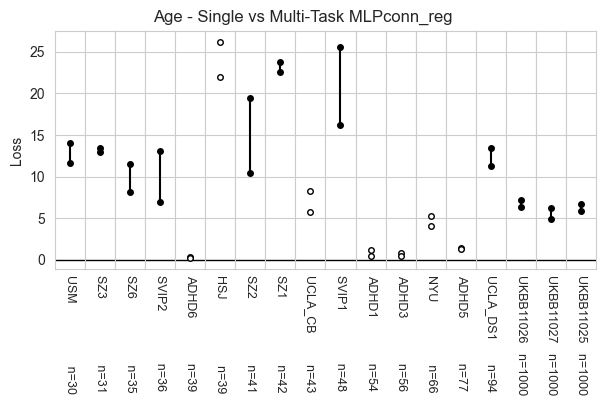

In [146]:
###############
# CONNECTOMES #
###############
title = 'Age - Single vs Multi-Task MLPconn_reg'
fig,ax = plt.subplots(1,len(sites),figsize=(6,4),sharey=True,sharex=True)
#plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites):
    st_loss = df.loc[site]['ST']
    mtl_loss = df.loc[site]['MTL']
    # DIRECTION IS INVERTED FOR LOSS
    if st_loss < mtl_loss:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_loss,mtl_loss),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(site_labels[j],rotation=270,fontsize=9)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1)
    b.set_linestyle('-')

ax[0].set_ylabel('Loss')
plt.suptitle(title)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(p_age,'figures/st_vs_mtl.png'),dpi=300)

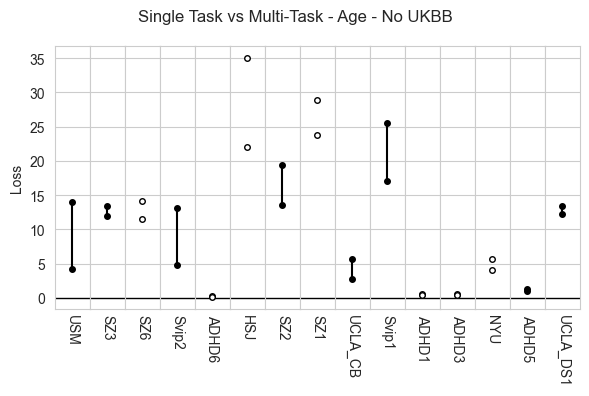

In [108]:
###############
# CONNECTOMES #
###############
title = 'Single Task vs Multi-Task - Age - No UKBB'
fig,ax = plt.subplots(1,len(sites_no_ukbb),figsize=(6,4),sharey=True,sharex=True)
#plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,site in enumerate(sites_no_ukbb):
    st_loss = df.loc[site]['ST']
    mtl_loss = df.loc[site]['MTL_no_ukbb']
    # DIRECTION IS INVERTED FOR LOSS
    if st_loss < mtl_loss:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_loss,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_loss,mtl_loss),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(sites[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1)
    b.set_linestyle('-')

ax[0].set_ylabel('Loss')
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(p_age,'figures/st_vs_mtl_no_ukbb.png'),dpi=300)